In [184]:
import pandas as pd

In [185]:
data = pd.read_csv('../heart.csv')

In [186]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [187]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1874,65,1,3,110,248,0,2,158,0,0.6,0,2,1,1
1875,47,1,2,108,243,0,0,152,0,0.0,0,0,0,1
1876,62,1,3,120,267,0,0,99,1,1.8,1,2,2,1
1877,52,1,3,128,255,0,0,161,1,0.0,0,1,2,1
1878,61,0,3,145,307,0,2,146,1,1.0,1,0,2,1


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1879 non-null   int64  
 1   sex       1879 non-null   int64  
 2   cp        1879 non-null   int64  
 3   trestbps  1879 non-null   int64  
 4   chol      1879 non-null   int64  
 5   fbs       1879 non-null   int64  
 6   restecg   1879 non-null   int64  
 7   thalach   1879 non-null   int64  
 8   exang     1879 non-null   int64  
 9   oldpeak   1879 non-null   float64
 10  slope     1879 non-null   int64  
 11  ca        1879 non-null   int64  
 12  thal      1879 non-null   int64  
 13  target    1879 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 205.6 KB


## Split Data

In [189]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

# Pisahkan fitur dan target
X = data.drop(columns=['target'])
y = data['target']

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=30, shuffle=True, random_state=42)

## Naïve Bayes 

In [190]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import pickle

# List untuk menampung hasil tiap fold
accuracies_nb = []
log_losses_nb = []
f1_scores_nb = []
precisions_nb = []
recalls_nb = []

# Loop k-fold
for train_index_nb, test_index_nb in kf.split(X):
    # Split data
    X_train_nb, X_test_nb = X.iloc[train_index_nb], X.iloc[test_index_nb]
    y_train_nb, y_test_nb = y.iloc[train_index_nb], y.iloc[test_index_nb]

    # Normalisasi fitur numerik (fit di train, transform di test)
    scaler = StandardScaler()
    X_train_nb = scaler.fit_transform(X_train_nb)
    X_test_nb = scaler.transform(X_test_nb)

    # Model Naïve Bayes
    model_nb = GaussianNB()
    model_nb.fit(X_train_nb, y_train_nb)

    # Prediksi
    y_pred_nb = model_nb.predict(X_test_nb)
    y_proba_nb = model_nb.predict_proba(X_test_nb)

    # Evaluasi
    accuracies_nb.append(accuracy_score(y_test_nb, y_pred_nb))
    log_losses_nb.append(log_loss(y_test_nb, y_proba_nb))
    f1_scores_nb.append(f1_score(y_test_nb, y_pred_nb, average='weighted'))
    precisions_nb.append(precision_score(y_test_nb, y_pred_nb, average='weighted'))
    recalls_nb.append(recall_score(y_test_nb, y_pred_nb, average='weighted'))
    
# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies_nb):.4f}")
print(f"Log Loss: {np.mean(log_losses_nb):.4f}")
print(f"F1-Score: {np.mean(f1_scores_nb):.4f}")
print(f"Precision: {np.mean(precisions_nb):.4f}")
print(f"Recall: {np.mean(recalls_nb):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_naive_bayes.pkl', 'wb') as model_file:
    pickle.dump(model_nb, model_file)

# Simpan scaler untuk normalisasi data baru nantinya
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Accuracy: 0.6638
Log Loss: 0.6277
F1-Score: 0.6623
Precision: 0.6675
Recall: 0.6638


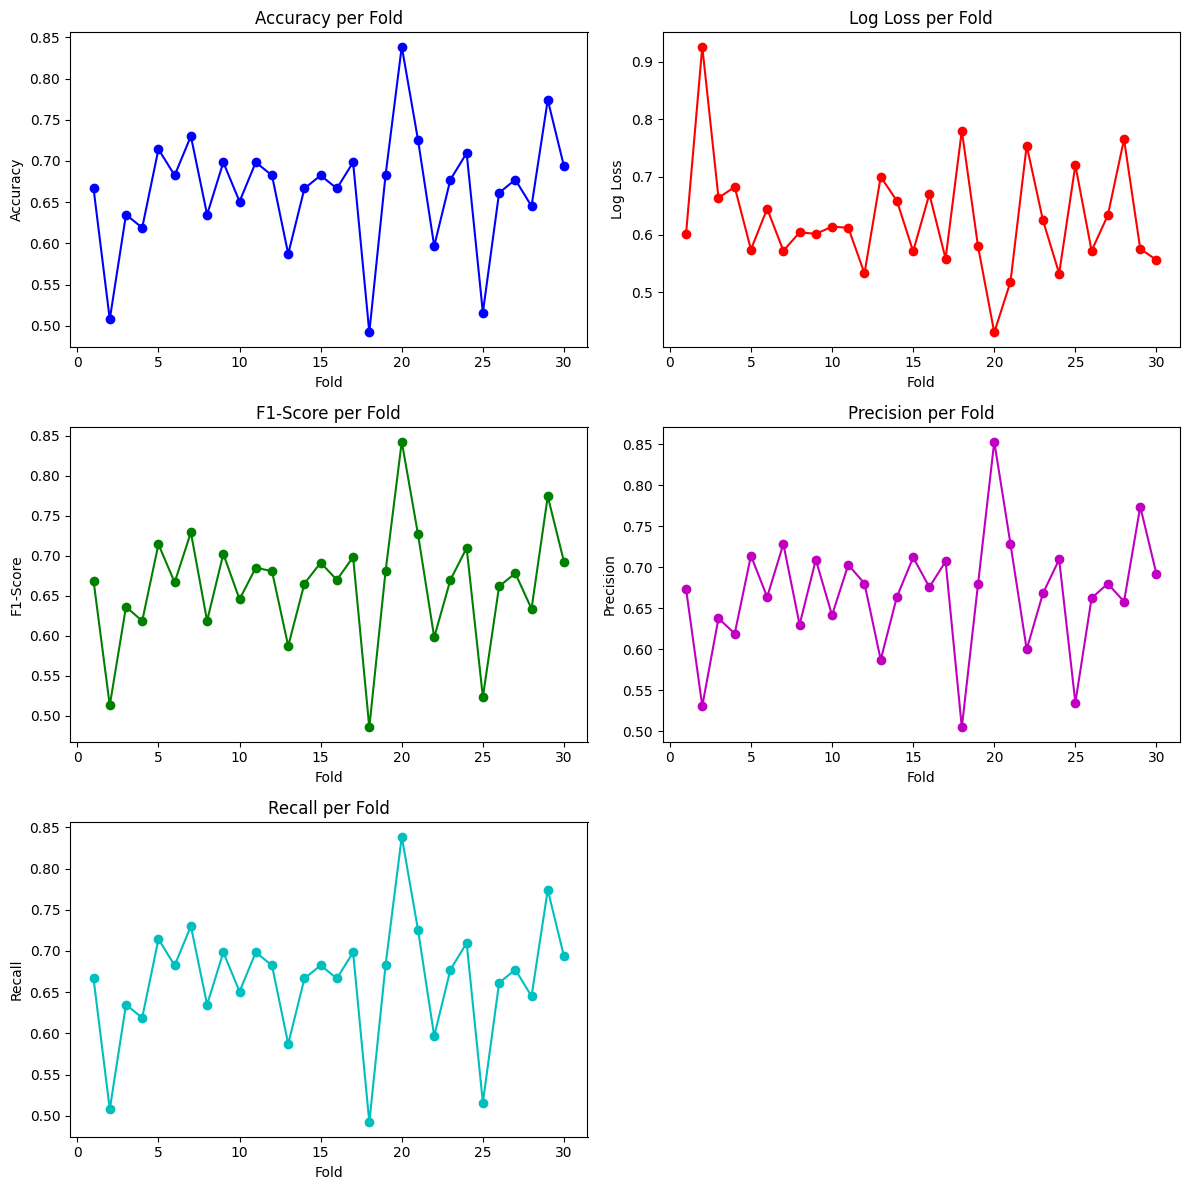


Average Accuracy: 0.6638
Average Log Loss: 0.6277
Average F1-Score: 0.6623
Average Precision: 0.6675
Average Recall: 0.6638


In [191]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_nb, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_nb, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_nb, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_nb, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_nb, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_nb):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_nb):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_nb):.4f}")
print(f"Average Precision: {np.mean(precisions_nb):.4f}")
print(f"Average Recall: {np.mean(recalls_nb):.4f}")

Confusion Matrix:
[[28  9]
 [10 15]]
TP: 15, TN: 28, FP: 9, FN: 10


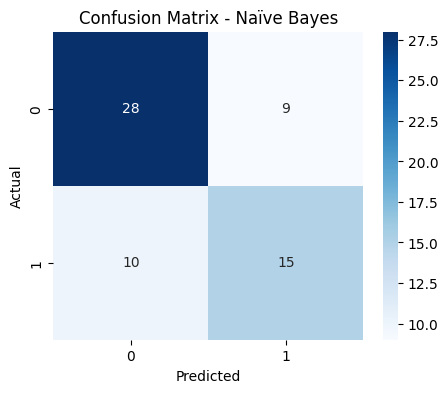

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_nb = model_nb.predict(X_test_nb)
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

print("Confusion Matrix Naïve Bayes:")
print(cm_nb)

TP_nb = cm_nb[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN_nb = cm_nb[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP_nb = cm_nb[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN_nb = cm_nb[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP_nb}, TN: {TN_nb}, FP: {FP_nb}, FN: {FN_nb}")

# Visualisasinya
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Naïve Bayes with SMOTE

In [193]:
# List untuk menampung hasil tiap fold
accuracies_nb_smote = []
log_losses_nb_smote = []
f1_scores_nb_smote = []
precisions_nb_smote = []
recalls_nb_smote = []

# Loop k-fold
for train_index_nb, test_index_nb in kf.split(X):
    # Split data
    X_train_nb, X_test_nb = X.iloc[train_index_nb], X.iloc[test_index_nb]
    y_train_nb, y_test_nb = y.iloc[train_index_nb], y.iloc[test_index_nb]

    # SMOTE Naïve Bayes
    X_train_nb_resampled, y_train_nb_resampled = smote.fit_resample(X_train_nb, y_train_nb)
    
    # Normalisasi fitur numerik (fit di train, transform di test)
    scaler = StandardScaler()
    X_train_nb_scaled = scaler.fit_transform(X_train_nb_resampled)
    X_test_nb_scaled = scaler.transform(X_test_nb)

    # Model Naïve Bayes
    model_nb = GaussianNB()
    model_nb.fit(X_train_nb_scaled, y_train_nb_resampled)

    # Prediksi
    y_pred_nb = model_nb.predict(X_test_nb)
    y_proba_nb = model_nb.predict_proba(X_test_nb)

    # Evaluasi
    accuracies_nb_smote.append(accuracy_score(y_test_nb, y_pred_nb))
    log_losses_nb_smote.append(log_loss(y_test_nb, y_proba_nb))
    f1_scores_nb_smote.append(f1_score(y_test_nb, y_pred_nb, average='weighted'))
    precisions_nb_smote.append(precision_score(y_test_nb, y_pred_nb, average='weighted'))
    recalls_nb_smote.append(recall_score(y_test_nb, y_pred_nb, average='weighted'))
    
# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies_nb_smote):.4f}")
print(f"Log Loss: {np.mean(log_losses_nb_smote):.4f}")
print(f"F1-Score: {np.mean(f1_scores_nb_smote):.4f}")
print(f"Precision: {np.mean(precisions_nb_smote):.4f}")
print(f"Recall: {np.mean(recalls_nb_smote):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_naive_bayes_smote.pkl', 'wb') as model_file:
    pickle.dump(model_nb, model_file)

# Simpan scaler untuk normalisasi data baru nantinya
with open('scaler_smote.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without

Accuracy: 0.4049
Log Loss: 21.4071
F1-Score: 0.2586
Precision: 0.2942
Recall: 0.4049


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without

In [194]:
print(f"\n--- Distribusi Kelas Naïve Bayes setelah SMOTE (Fold {len(accuracies_nb) + 1}) ---")
print("Jumlah sampel kelas 0 (setelah SMOTE):", y_train_nb_resampled.value_counts()[0])
print("Jumlah sampel kelas 1 (setelah SMOTE):", y_train_nb_resampled.value_counts()[1])


--- Distribusi Kelas Naïve Bayes setelah SMOTE (Fold 31) ---
Jumlah sampel kelas 0 (setelah SMOTE): 1078
Jumlah sampel kelas 1 (setelah SMOTE): 1078


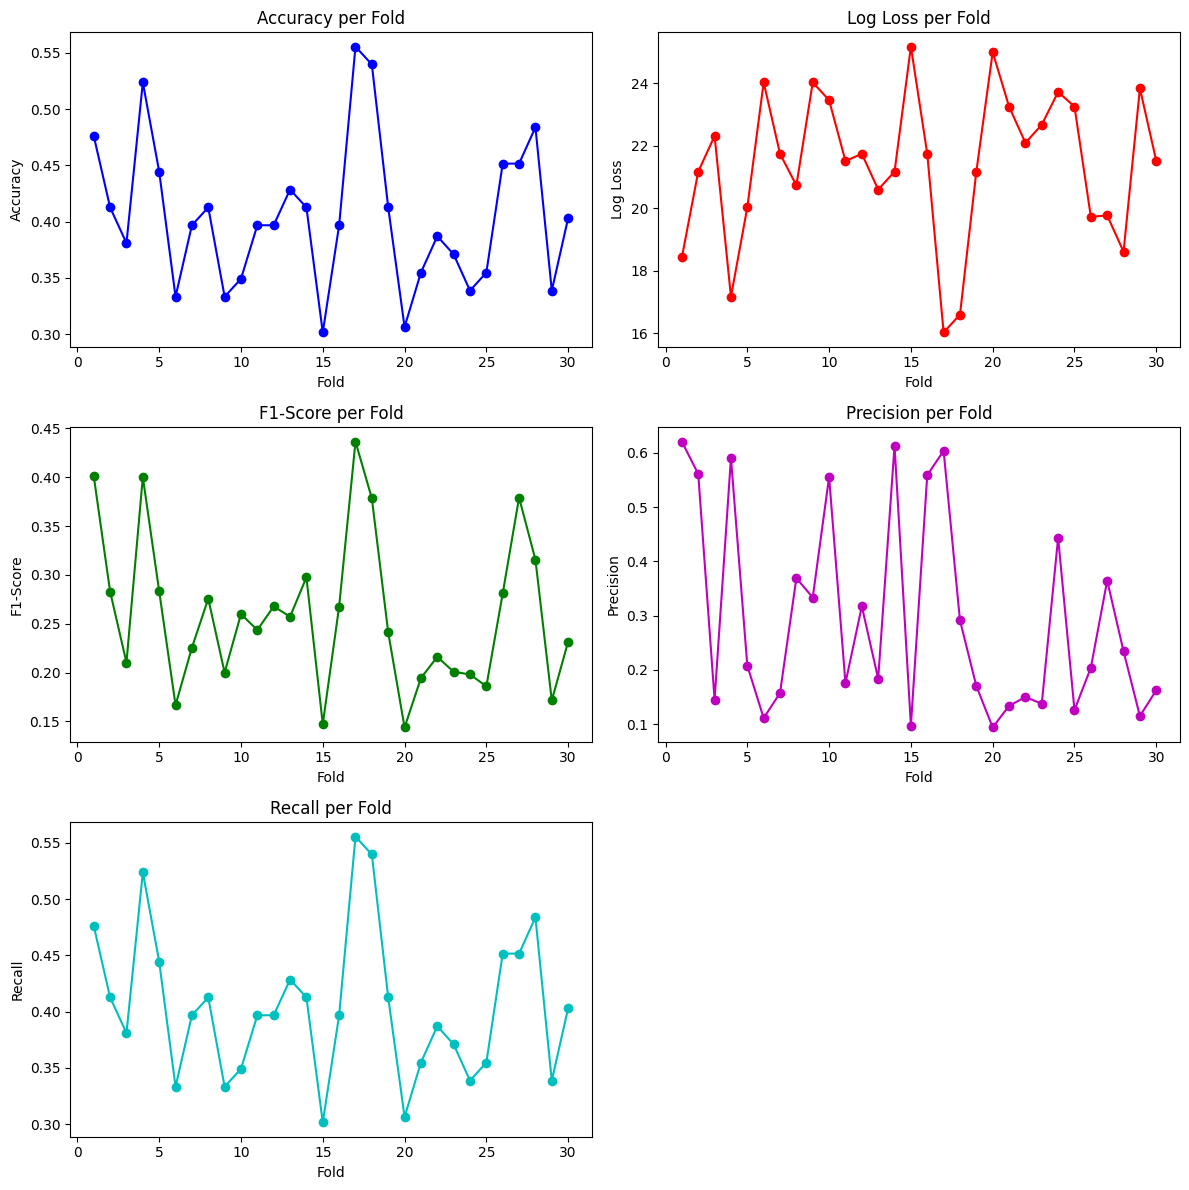


Average Accuracy: 0.4049
Average Log Loss: 21.4071
Average F1-Score: 0.2586
Average Precision: 0.2942
Average Recall: 0.4049


In [195]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_nb_smote, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_nb_smote, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_nb_smote, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_nb_smote, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_nb_smote, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_nb_smote):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_nb_smote):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_nb_smote):.4f}")
print(f"Average Precision: {np.mean(precisions_nb_smote):.4f}")
print(f"Average Recall: {np.mean(recalls_nb_smote):.4f}")

Confusion Matrix:
[[ 0 37]
 [ 0 25]]
TP: 25, TN: 0, FP: 37, FN: 0


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


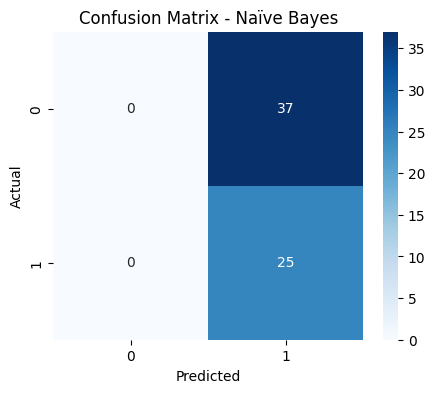

In [ ]:
y_pred_nb_smote = model_nb.predict(X_test_nb)
cm_nb_smote = confusion_matrix(y_test_nb, y_pred_nb_smote)

print("Confusion Matrix:")
print(cm_nb_smote)

TP_nb_smote = cm_nb_smote[1, 1]  
TN_nb_smote = cm_nb_smote[0, 0]  
FP_nb_smote = cm_nb_smote[0, 1]  
FN_nb_smote = cm_nb_smote[1, 0]  

print(f"TP: {TP_nb_smote}, TN: {TN_nb_smote}, FP: {FP_nb_smote}, FN: {FN_nb_smote}")

# Visualisasinya
plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naïve Bayes') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier

# List untuk menampung hasil tiap fold
accuracies_rf = []
log_losses_rf = []
f1_scores_rf = []
precisions_rf = []
recalls_rf = []

# Looping k-fold cross-validation
for train_index_rf, test_index_rf in kf.split(X):
    X_train_rf, X_test_rf = X.iloc[train_index_rf], X.iloc[test_index_rf]
    y_train_rf, y_test_rf = y.iloc[train_index_rf], y.iloc[test_index_rf]

    # Inisialisasi model Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model_rf.fit(X_train_rf, y_train_rf)

    # Prediksi
    y_pred_rf = model_rf.predict(X_test_rf)
    y_pred_proba_rf = model_rf.predict_proba(X_test_rf)

    # Evaluasi
    accuracies_rf.append(accuracy_score(y_test_rf, y_pred_rf))
    log_losses_rf.append(log_loss(y_test_rf, y_pred_proba_rf))
    f1_scores_rf.append(f1_score(y_test_rf, y_pred_rf, average='weighted'))
    precisions_rf.append(precision_score(y_test_rf, y_pred_rf, average='weighted'))
    recalls_rf.append(recall_score(y_test_rf, y_pred_rf, average='weighted'))

# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies_rf):.4f}")
print(f"Log Loss: {np.mean(log_losses_rf):.4f}")
print(f"F1-Score: {np.mean(f1_scores_rf):.4f}")
print(f"Precision: {np.mean(precisions_rf):.4f}")
print(f"Recall: {np.mean(recalls_rf):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_random_forest.pkl', 'wb') as model_file:
    pickle.dump(model_rf, model_file)

Accuracy: 0.8467
Log Loss: 0.4003
F1-Score: 0.8458
Precision: 0.8534
Recall: 0.8467


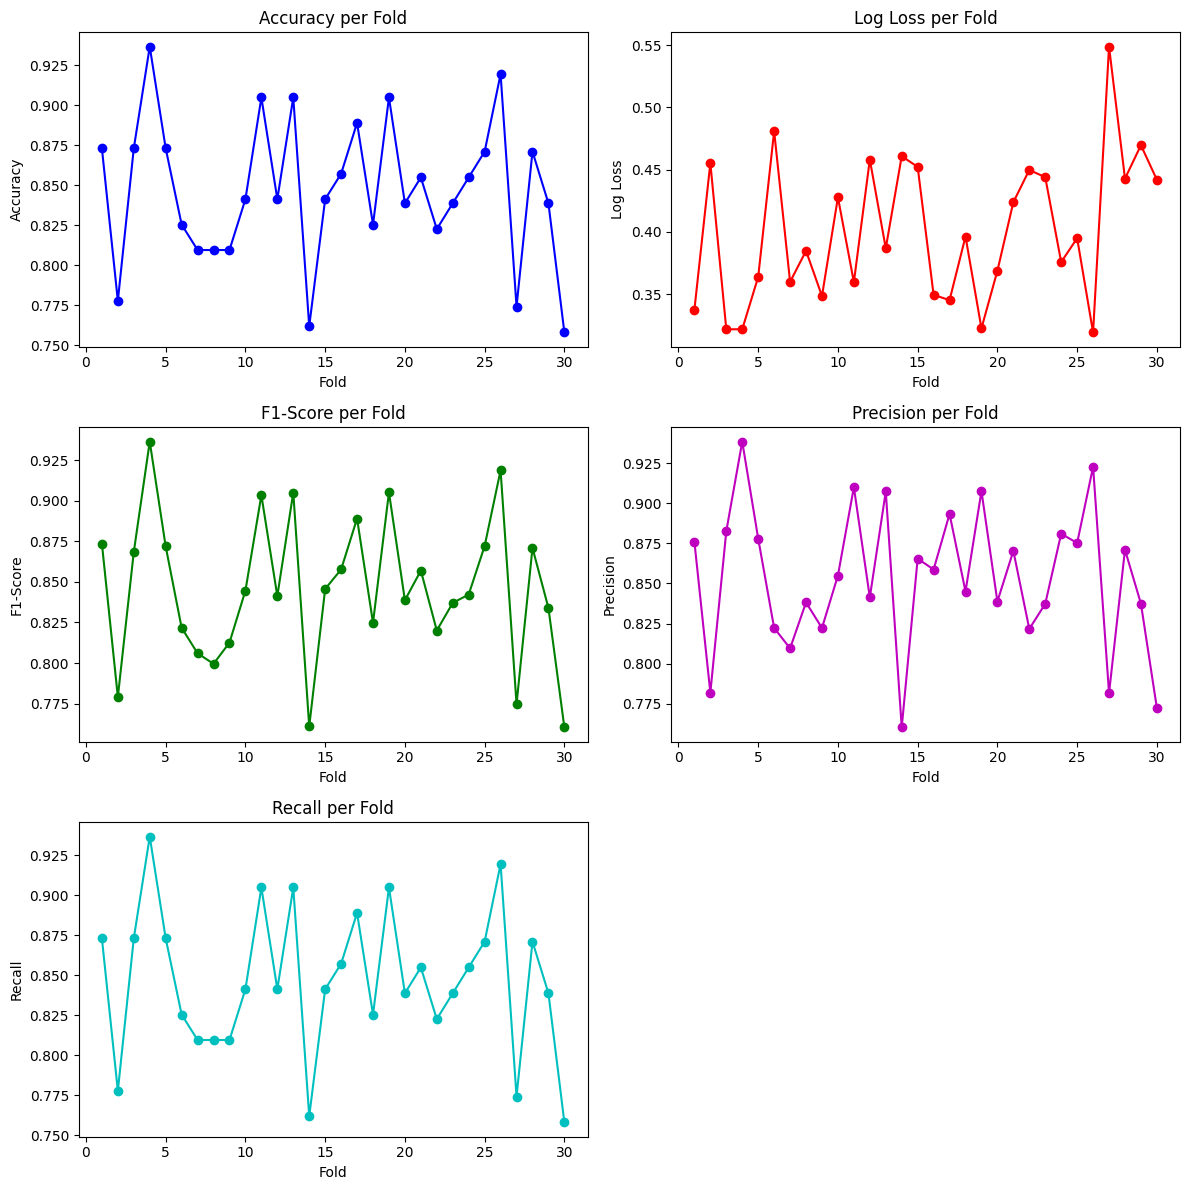


Average Accuracy: 0.8467
Average Log Loss: 0.4003
Average F1-Score: 0.8458
Average Precision: 0.8534
Average Recall: 0.8467


In [198]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_rf, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_rf, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_rf, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_rf, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_rf, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_rf):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_rf):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_rf):.4f}")
print(f"Average Precision: {np.mean(precisions_rf):.4f}")
print(f"Average Recall: {np.mean(recalls_rf):.4f}")

Confusion Matrix:
[[27 10]
 [ 5 20]]
TP: 20, TN: 27, FP: 10, FN: 5


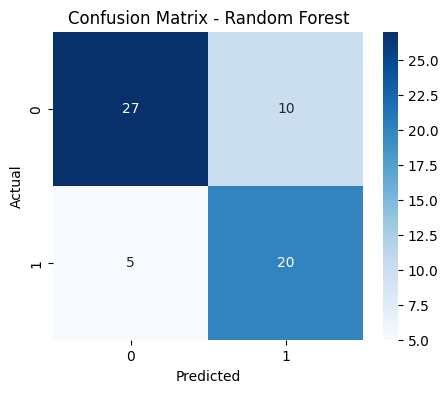

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_rf = model_rf.predict(X_test_rf)
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("Confusion Matrix:")
print(cm_rf)

TP_rf = cm_rf[1, 1]  
TN_rf = cm_rf[0, 0] 
FP_rf = cm_rf[0, 1] 
FN_rf = cm_rf[1, 0]  

print(f"TP: {TP_rf}, TN: {TN_rf}, FP: {FP_rf}, FN: {FN_rf}")

# Visualisasinya
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest with SMOTE

In [200]:
from sklearn.ensemble import RandomForestClassifier

# List untuk menampung hasil tiap fold
accuracies_rf_smote = []
log_losses_rf_smote = []
f1_scores_rf_smote = []
precisions_rf_smote = []
recalls_rf_smote = []

# Looping k-fold cross-validation
for train_index_rf, test_index_rf in kf.split(X):
    X_train_rf, X_test_rf = X.iloc[train_index_rf], X.iloc[test_index_rf]
    y_train_rf, y_test_rf = y.iloc[train_index_rf], y.iloc[test_index_rf]

    # SMOTE Random Forest
    smote = SMOTE(random_state=42) 
    X_train_rf_resampled, y_train_rf_resampled = smote.fit_resample(X_train_rf, y_train_rf)

    # Inisialisasi model Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model_rf.fit(X_train_rf_resampled, y_train_rf_resampled)

    # Prediks
    y_pred_rf = model_rf.predict(X_test_rf)
    y_pred_proba_rf = model_rf.predict_proba(X_test_rf)

    # Evaluasi
    accuracies_rf_smote.append(accuracy_score(y_test_rf, y_pred_rf))
    log_losses_rf_smote.append(log_loss(y_test_rf, y_pred_proba_rf))
    f1_scores_rf_smote.append(f1_score(y_test_rf, y_pred_rf, average='weighted'))
    precisions_rf_smote.append(precision_score(y_test_rf, y_pred_rf, average='weighted'))
    recalls_rf_smote.append(recall_score(y_test_rf, y_pred_rf, average='weighted'))


# Tampilkan hasil rata-rata (ini di luar loop)
print(f"\nAverage Accuracy: {np.mean(accuracies_rf_smote):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_rf_smote):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_rf_smote):.4f}")
print(f"Average Precision: {np.mean(precisions_rf_smote):.4f}")
print(f"Average Recall: {np.mean(recalls_rf_smote):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_random_forest_smote.pkl', 'wb') as model_file:
    pickle.dump(model_rf, model_file)


Average Accuracy: 0.8360
Average Log Loss: 0.4662
Average F1-Score: 0.8366
Average Precision: 0.8439
Average Recall: 0.8360


In [201]:
print(f"\n--- Distribusi Kelas Random Forest setelah SMOTE (Fold {len(accuracies_rf) + 1}) ---")
print("Jumlah sampel kelas 0 (setelah SMOTE):", y_train_rf_resampled.value_counts()[0])
print("Jumlah sampel kelas 1 (setelah SMOTE):", y_train_rf_resampled.value_counts()[1])


--- Distribusi Kelas Random Forest setelah SMOTE (Fold 31) ---
Jumlah sampel kelas 0 (setelah SMOTE): 1078
Jumlah sampel kelas 1 (setelah SMOTE): 1078


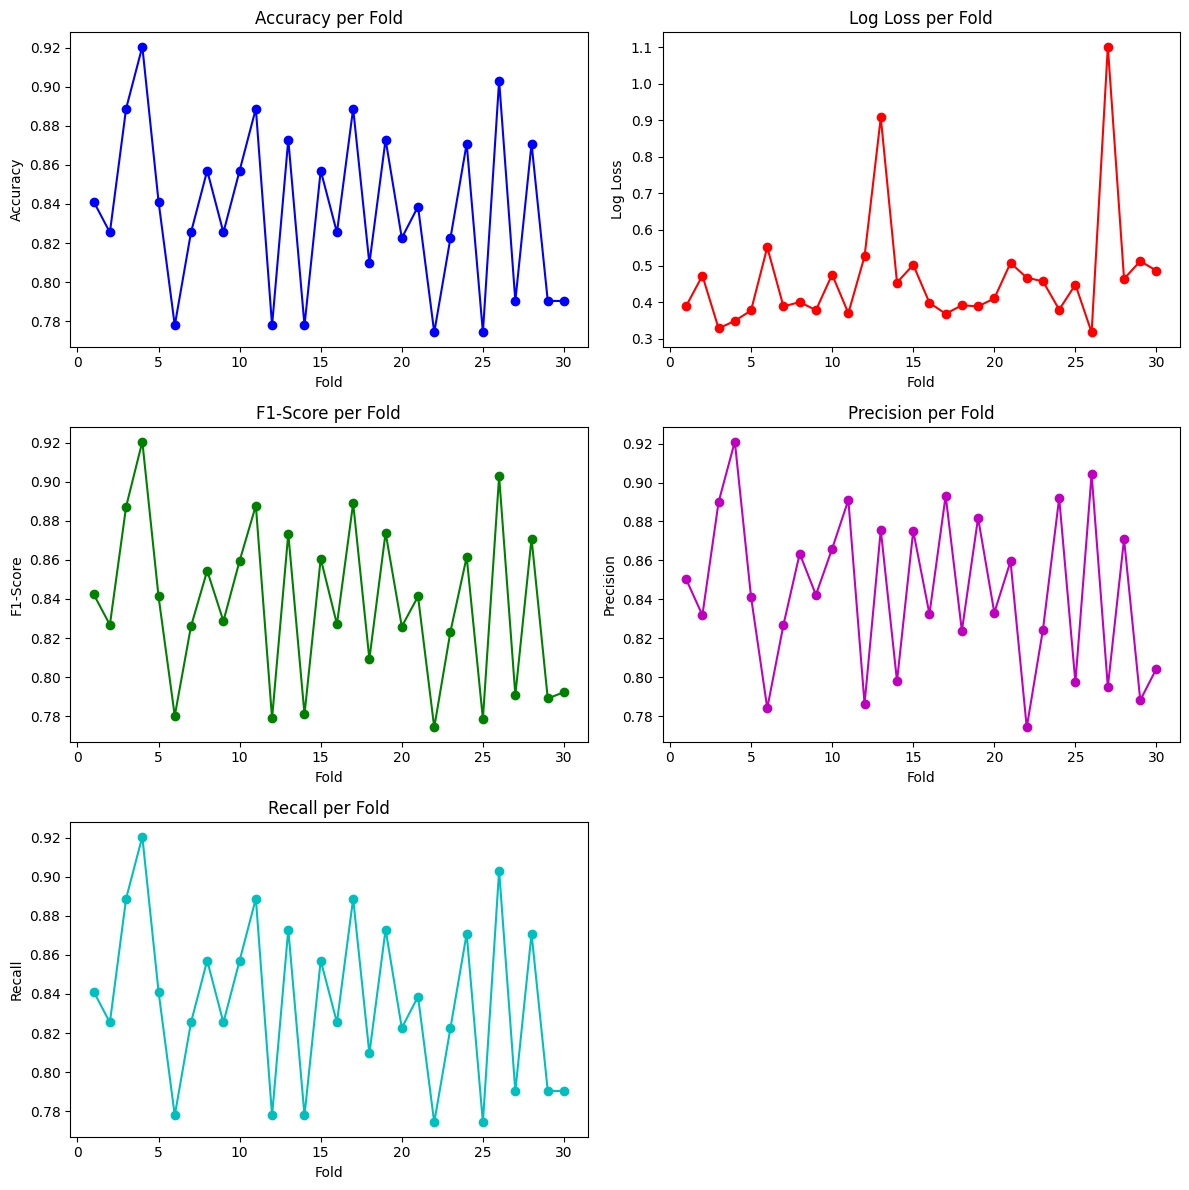


Average Accuracy: 0.8360
Average Log Loss: 0.4662
Average F1-Score: 0.8366
Average Precision: 0.8439
Average Recall: 0.8360


In [202]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_rf_smote, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_rf_smote, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_rf_smote, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_rf_smote, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_rf_smote, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_rf_smote):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_rf_smote):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_rf_smote):.4f}")
print(f"Average Precision: {np.mean(precisions_rf_smote):.4f}")
print(f"Average Recall: {np.mean(recalls_rf_smote):.4f}")

Confusion Matrix:
[[28  9]
 [ 4 21]]
TP: 21, TN: 28, FP: 9, FN: 4


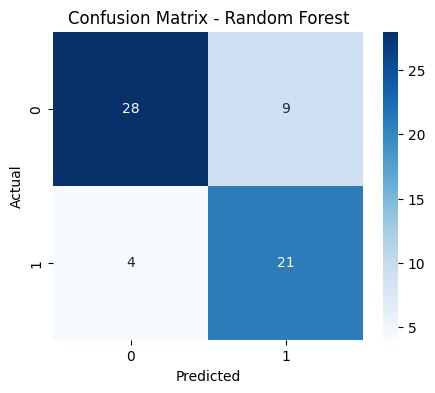

In [ ]:
y_pred_rf_smote = model_rf.predict(X_test_rf)
cm_rf_smote = confusion_matrix(y_test_rf, y_pred_rf_smote)

print("Confusion Matrix:")
print(cm_rf_smote)

TP_rf_smote = cm_rf_smote[1, 1] 
TN_rf_smote = cm_rf_smote[0, 0]  
FP_rf_smote = cm_rf_smote[0, 1]  
FN_rf_smote = cm_rf_smote[1, 0] 

print(f"TP: {TP_rf_smote}, TN: {TN_rf_smote}, FP: {FP_rf_smote}, FN: {FN_rf_smote}")

# Visualisasinya
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Predict


In [ ]:
# Muat model Naïve Bayes yang dilatih tanpa SMOTE
with open('model_naive_bayes.pkl', 'rb') as model_file:
    model_nb_no_smote = pickle.load(model_file)

# Muat scaler yang digunakan dengan Naïve Bayes yang dilatih tanpa SMOTE
with open('scaler.pkl', 'rb') as scaler_file:
    scaler_no_smote = pickle.load(scaler_file)

# Muat model Random Forest yang dilatih tanpa SMOTE
with open('model_random_forest.pkl', 'rb') as model_file:
    model_rf_no_smote = pickle.load(model_file)

# Muat model Naïve Bayes yang dilatih dengan SMOTE
with open('model_naive_bayes_smote.pkl', 'rb') as model_file:
    model_nb_smote = pickle.load(model_file)

# Muat scaler yang digunakan dengan Naïve Bayes yang dilatih dengan SMOTE
with open('scaler_smote.pkl', 'rb') as scaler_file:
    scaler_smote = pickle.load(scaler_file)

# Muat model Random Forest yang dilatih dengan SMOTE
# Asumsi model_random_forest.pkl ini adalah yang terakhir disimpan dari loop SMOTE RF
with open('model_random_forest.pkl', 'rb') as model_file:
    model_rf_smote = pickle.load(model_file)

# --- Fungsi Pembantu untuk Prediksi dan Cetak Hasil ---
def make_and_print_predictions(data_point, data_label):
    print(f"--- Prediksi untuk {data_label} ---")

    # --- Naïve Bayes (Tanpa SMOTE) ---
    data_scaled_nb_no_smote = scaler_no_smote.transform(data_point)
    pred_nb_no_smote = model_nb_no_smote.predict(data_scaled_nb_no_smote)
    proba_nb_no_smote = model_nb_no_smote.predict_proba(data_scaled_nb_no_smote)

    print("\n[Naïve Bayes - TANPA SMOTE]")
    print(f"Prediksi: {'Berisiko Penyakit Jantung' if pred_nb_no_smote[0] == 1 else 'Tidak Berisiko Penyakit Jantung'}")
    print(f"Probabilitas: {proba_nb_no_smote}")

    # --- Random Forest (Tanpa SMOTE) ---
    pred_rf_no_smote = model_rf_no_smote.predict(data_point)
    proba_rf_no_smote = model_rf_no_smote.predict_proba(data_point)

    print("\n[Random Forest - TANPA SMOTE]")
    print(f"Prediksi: {'Berisiko Penyakit Jantung' if pred_rf_no_smote[0] == 1 else 'Tidak Berisiko Penyakit Jantung'}")
    print(f"Probabilitas: {proba_rf_no_smote}")

    # --- Naïve Bayes (Dengan SMOTE) ---
    data_scaled_nb_smote = scaler_smote.transform(data_point)
    pred_nb_smote = model_nb_smote.predict(data_scaled_nb_smote)
    proba_nb_smote = model_nb_smote.predict_proba(data_scaled_nb_smote)

    print("\n[Naïve Bayes - DENGAN SMOTE]")
    print(f"Prediksi: {'Berisiko Penyakit Jantung' if pred_nb_smote[0] == 1 else 'Tidak Berisiko Penyakit Jantung'}")
    print(f"Probabilitas: {proba_nb_smote}")

    # --- Random Forest (Dengan SMOTE) ---
    pred_rf_smote = model_rf_smote.predict(data_point)
    proba_rf_smote = model_rf_smote.predict_proba(data_point)

    print("\n[Random Forest - DENGAN SMOTE]")
    print(f"Prediksi: {'Berisiko Penyakit Jantung' if pred_rf_smote[0] == 1 else 'Tidak Berisiko Penyakit Jantung'}")
    print(f"Probabilitas: {proba_rf_smote}")

    print("\n" + "="*70 + "\n") # Pemisah antar data baru

# --- Data Baru untuk Prediksi ---
data_baru1 = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]]) # Asli: target 0 (sehat)
data_baru2 = np.array([[54, 0, 2, 110, 214, 0, 1, 158, 0, 1.6, 1, 0, 2]]) # Asli: target 1 (sakit)
data_baru3 = np.array([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]) # Asli: target 1 (sakit)
data_baru4 = np.array([[58, 1, 1, 120, 284, 0, 0, 160, 0, 1.8, 1, 0, 2]]) # Asli: target 0 (sehat)


# --- Lakukan Prediksi untuk setiap data baru ---
make_and_print_predictions(data_baru1, "Data Baru 1 (Asli Target: 0)")
make_and_print_predictions(data_baru2, "Data Baru 2 (Asli Target: 1)")
make_and_print_predictions(data_baru3, "Data Baru 3 (Asli Target: 1)")
make_and_print_predictions(data_baru4, "Data Baru 4 (Asli Target: 0)")

--- Prediksi untuk Data Baru 1 (Asli Target: 1) ---

[Naïve Bayes - TANPA SMOTE]
Prediksi: Berisiko Penyakit Jantung
Probabilitas: [[0.27294662 0.72705338]]

[Random Forest - TANPA SMOTE]
Prediksi: Tidak Berisiko Penyakit Jantung
Probabilitas: [[0.9 0.1]]

[Naïve Bayes - DENGAN SMOTE]
Prediksi: Berisiko Penyakit Jantung
Probabilitas: [[0.36321041 0.63678959]]

[Random Forest - DENGAN SMOTE]
Prediksi: Tidak Berisiko Penyakit Jantung
Probabilitas: [[0.9 0.1]]


--- Prediksi untuk Data Baru 2 (Asli Target: 1) ---

[Naïve Bayes - TANPA SMOTE]
Prediksi: Tidak Berisiko Penyakit Jantung
Probabilitas: [[0.61322853 0.38677147]]

[Random Forest - TANPA SMOTE]
Prediksi: Berisiko Penyakit Jantung
Probabilitas: [[0.09 0.91]]

[Naïve Bayes - DENGAN SMOTE]
Prediksi: Berisiko Penyakit Jantung
Probabilitas: [[0.37107799 0.62892201]]

[Random Forest - DENGAN SMOTE]
Prediksi: Berisiko Penyakit Jantung
Probabilitas: [[0.09 0.91]]


--- Prediksi untuk Data Baru 3 (Asli Target: 1) ---

[Naïve Bayes - TANPA 

C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: 

In [ ]:
importances = model_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.4f}")

age: 0.1060
sex: 0.0243
cp: 0.0982
trestbps: 0.0989
chol: 0.1063
fbs: 0.0139
restecg: 0.0619
thalach: 0.1165
exang: 0.0247
oldpeak: 0.1135
slope: 0.0877
ca: 0.0659
thal: 0.0821


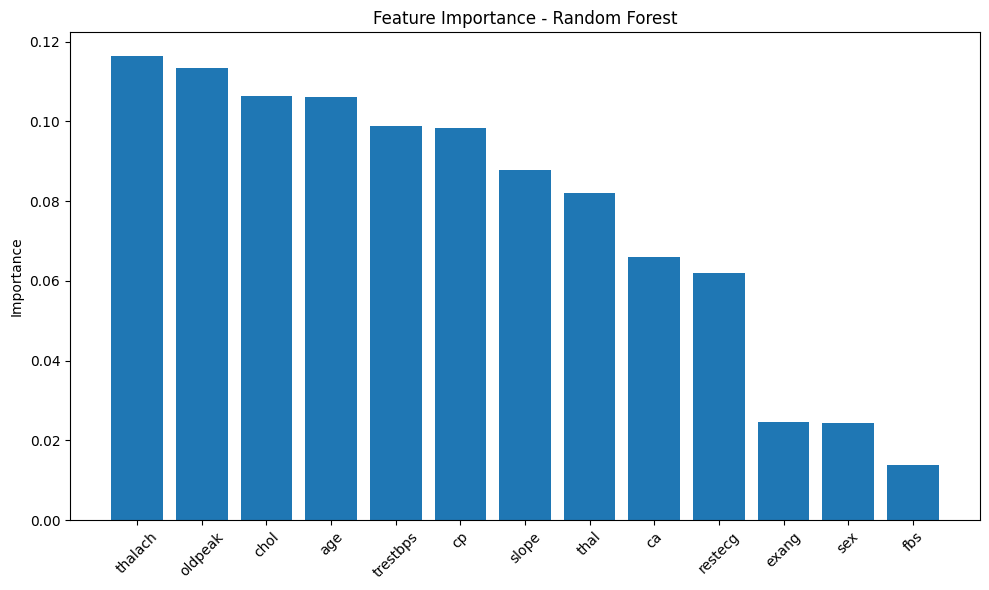

In [214]:
import numpy as np

feature_names = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
